# Cohort Analysis

## **Dataset**

Dataset yang digunakan merupakan data **Online Retail II** ini berisi data transaksi yang terjadi untuk ritel online non-toko  di UK pada periode **01/12/2010 - 09/12/2011**. Dataset tersebut terdiri dari **8 feature**, antara lain:
1. **InvoiceNo**: Nomor struk transaksi yang terdiri dari 6 digit. Jika kode ini dimulai dengan huruf 'c', ini menunjukkan pembatalan.
2. **StockCode**: Kode produk/item yang terdiri 5 digit yang secara unik untuk setiap produk.
3. **Description**: Nama produk/item.
4. **Quantity**: Jumlah setiap produk/item setiap transaksi.
5. **InvoiceDate**: Waktu melakukan transaksi.
6. **UnitPrice**:  Harga produk per unit.
7. **CustomerID**: Nomor ID pelanggan yang terdiri 5 digit yang ditetapkan secara unik untuk setiap pelanggan.
8. **Country**: Nama negara tempat tinggal pelanggan.

Sumber: <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail">https://archive.ics.uci.edu/ml/datasets/Online+Retail</a>

## **Objektif:**

Perusahaan ingin mengetahui seberapa banyak **customer** yang **churn** setiap bulannya pada **top 1 jumlah customer** menurut negara tempat tinggal.

## **Library**

In [1]:
#Manipulasi Data
import pandas as pd
import numpy as np
import datetime as dt
#Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
#Tidak menampilkan warning
import warnings
warnings.filterwarnings('ignore')

## **Import Data**

In [2]:
df = pd.read_excel("Online Retail.xlsx", sheet_name="Online Retail", header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Manipulasi Data dan Eksplorasi Data Analysis**

In [3]:
def struktur_data(X):
    print('================================================================')
    print('STRUKTUR DATA')
    print('----------------------------------------------------------------')
    print(f'Baris : {X.shape[0]}')
    print(f'Kolom : {X.shape[1]}')
    print(f'Nama {X.shape[1]} kolom pada dataset antara lain: ')
    print(f'{X.columns.values}')
    print('================================================================')
    print('TYPE-TYPE DATA')
    print('----------------------------------------------------------------')
    display(X.info())
    
struktur_data(df)

STRUKTUR DATA
----------------------------------------------------------------
Baris : 541909
Kolom : 8
Nama 8 kolom pada dataset antara lain: 
['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']
TYPE-TYPE DATA
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory

None

Berdasarkan hasil diatas dapat disimpulkan bahwa:
1. Dataset terdiri dari **541.909 baris** dan **8 Feature/Kolom** (InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, dan Country)
2. Feature **Description** dan **CustomerID** memiliki values **non-null** yang tidak sama dengan total baris secara keseluruhan atau terindikasi adanya missing value.

In [4]:
#Cek data duplikat dan penanganan data duplikat
def data_duplikat(X):
  dt_duplicated = X.duplicated().sum()
  if dt_duplicated == 0:
    print('Cek Data Duplicated')
    print('-----------------------------------------------------------')
    print('Jumlah Data Duplicated : {}'.format(dt_duplicated))
  else:
    print('Cek Data Duplicated')
    print('---------------------------------------------------------------------------------------------------------------')
    print(f'Jumlah Data Duplicated Sebelum Handling : {X.duplicated().sum()}')
    print('Berikut 5 baris data duplikat:')
    display(X[X.duplicated()].head())
    X.drop_duplicates(inplace = True)
    print('---------------------------------------------------------------------------------------------------------------')
    print(f'Jumlah Data Duplicated Sesudah Handling : {X.duplicated().sum()}')
    
data_duplikat(df)

Cek Data Duplicated
---------------------------------------------------------------------------------------------------------------
Jumlah Data Duplicated Sebelum Handling : 5268
Berikut 5 baris data duplikat:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


---------------------------------------------------------------------------------------------------------------
Jumlah Data Duplicated Sesudah Handling : 0


In [5]:
#Struktur data setelah penanganan data duplikat
struktur_data(df)

STRUKTUR DATA
----------------------------------------------------------------
Baris : 536641
Kolom : 8
Nama 8 kolom pada dataset antara lain: 
['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']
TYPE-TYPE DATA
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory

None

Berdasarkan hasil **penanganan data duplikat** diatas dapat disimpulkan bahwa:
1. Terdapat data duplikat  sebanyak **5.268** sehingga dataset berubah menjadi **536.641 baris** dan **8 Feature/Kolom**  dari **541.909 baris** dan **8 Feature/Kolom**.
2. Feature **Description** dan **CustomerID** masih memiliki values **non-null** yang tidak sama dengan total baris secara keseluruhan.

In [6]:
#Cek data missing
def data_missing(X):
    hasil = pd.DataFrame({
        'Total Data Missing' : X.isna().sum(),
        '%' : round((X.isna().sum()/X.shape[0])*100,2)
    })
    return hasil

data_missing(df)

,Total Data Missing,%
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135037,25.16
Country,0,0.00


Berdasarkan hasil **cek missing value** diatas dapat disimpulkan bahwa:
1. Terdapat **2 feature** yang memiliki **missing value** yaitu **Description** dan **CustomerID**.
2. Kedua feature sangat penting dikarenakan untuk mengetahui **ID Customer** dan **Produk** sehingga data missing value dilakukan drop berdasarkan **baris**.

In [7]:
#Penanganan data missing
df.dropna(axis = 0, inplace = True)

In [8]:
data_missing(df)

,Total Data Missing,%
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


In [9]:
#Struktur data setelah penanganan data missing
struktur_data(df)

STRUKTUR DATA
----------------------------------------------------------------
Baris : 401604
Kolom : 8
Nama 8 kolom pada dataset antara lain: 
['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']
TYPE-TYPE DATA
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory

None

Berdasarkan hasil **penanganan data missing** diatas dapat disimpulkan bahwa:
1. Dataset berubah menjadi **401.604 baris** dan **8 Feature/Kolom** dari **536.641 baris** dan **8 Feature/Kolom**.
2. Feature **Description** dan **CustomerID** telah memiliki values **non-null** yang sama dengan total baris secara keseluruhan.

In [10]:
#Kolom Amount (Quantity x UnitPrice)
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
#Statistik Deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
Amount,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6


Berdasarkan statistik deskriptif diatas dapat disimpulkan bahwa:
Feature **Quantity**, **UnitPrice**, dan **Amount** memiliki nilai **min** <= 0. Kondisi tersebut dapat diartikan **Customer** pada baris tersebut **tidak melakukan transaksi/pembatalan transkasi** sehingga tidak perlu untuk dilakukan analisis.

In [12]:
#Filter Data
df_baru = df[(df.Quantity >= 1)]
df_baru.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
#Cek type data
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   Amount       392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


Berdasarkan hasil diatas dapat disimpulkan **type data** setiap feature telah **sesuai** sehingga **tidak perlu** adanya perubahan type data.

In [14]:
df_baru['CustomerID'] = df_baru['CustomerID'].astype(int)
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int32         
 7   Country      392732 non-null  object        
 8   Amount       392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


In [15]:
#Seleksi kolom
data = pd.DataFrame(df_baru.groupby(["InvoiceDate","CustomerID"]).agg({'Quantity':sum, 'UnitPrice':sum, 'Amount':sum,
                                                                       'Country':max})).reset_index()
data.head()

,InvoiceDate,CustomerID,Quantity,UnitPrice,Amount,Country
0,2010-12-01 08:26:00,17850,40,27.37,139.12,United Kingdom
1,2010-12-01 08:28:00,17850,12,3.70,22.20,United Kingdom
2,2010-12-01 08:34:00,13047,98,77.34,348.78,United Kingdom
3,2010-12-01 08:35:00,13047,3,5.95,17.85,United Kingdom
4,2010-12-01 08:45:00,12583,449,55.29,855.86,France


In [16]:
#Membuat Periode Transaksi dari Feature InvoiceDate
data['PeriodeTransaction']= data.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
data.head()

,InvoiceDate,CustomerID,Quantity,UnitPrice,Amount,Country,PeriodeTransaction
0,2010-12-01 08:26:00,17850,40,27.37,139.12,United Kingdom,2010-12
1,2010-12-01 08:28:00,17850,12,3.70,22.20,United Kingdom,2010-12
2,2010-12-01 08:34:00,13047,98,77.34,348.78,United Kingdom,2010-12
3,2010-12-01 08:35:00,13047,3,5.95,17.85,United Kingdom,2010-12
4,2010-12-01 08:45:00,12583,449,55.29,855.86,France,2010-12


In [17]:
#Membuat Periode Awal Transaksi dari Feature Periode Transaksi
data['FirstTransaction'] = data.groupby('CustomerID')['PeriodeTransaction'].transform('min')
data.head()

,InvoiceDate,CustomerID,Quantity,UnitPrice,Amount,Country,PeriodeTransaction,FirstTransaction
0,2010-12-01 08:26:00,17850,40,27.37,139.12,United Kingdom,2010-12,2010-12
1,2010-12-01 08:28:00,17850,12,3.70,22.20,United Kingdom,2010-12,2010-12
2,2010-12-01 08:34:00,13047,98,77.34,348.78,United Kingdom,2010-12,2010-12
3,2010-12-01 08:35:00,13047,3,5.95,17.85,United Kingdom,2010-12,2010-12
4,2010-12-01 08:45:00,12583,449,55.29,855.86,France,2010-12,2010-12


In [18]:
#Membuat selisih transaksi awal dengan transaksi pada saat itu
def dif_periode(x):
    d1 = pd.to_datetime(x['PeriodeTransaction'])
    d2 = pd.to_datetime(x['FirstTransaction'])
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1

data['CohortPeriode'] = data.apply(lambda x: dif_periode(x), axis=1)
data.head()

,InvoiceDate,CustomerID,Quantity,UnitPrice,Amount,Country,PeriodeTransaction,FirstTransaction,CohortPeriode
0,2010-12-01 08:26:00,17850,40,27.37,139.12,United Kingdom,2010-12,2010-12,1
1,2010-12-01 08:28:00,17850,12,3.70,22.20,United Kingdom,2010-12,2010-12,1
2,2010-12-01 08:34:00,13047,98,77.34,348.78,United Kingdom,2010-12,2010-12,1
3,2010-12-01 08:35:00,13047,3,5.95,17.85,United Kingdom,2010-12,2010-12,1
4,2010-12-01 08:45:00,12583,449,55.29,855.86,France,2010-12,2010-12,1


In [19]:
#Seleksi New Customer periode 01-2011 s/d 12-2011
data_2011 = data[data.FirstTransaction >= '2011-01']
data_2011.head()

,InvoiceDate,CustomerID,Quantity,UnitPrice,Amount,Country,PeriodeTransaction,FirstTransaction,CohortPeriode
1389,2011-01-04 10:00:00,13313,171,38.04,307.30,United Kingdom,2011-01,2011-01,1
1393,2011-01-04 10:37:00,16875,140,131.30,368.80,United Kingdom,2011-01,2011-01,1
1398,2011-01-04 11:42:00,16282,114,30.05,168.30,United Kingdom,2011-01,2011-01,1
1400,2011-01-04 12:18:00,12957,352,86.09,413.68,United Kingdom,2011-01,2011-01,1
1401,2011-01-04 12:45:00,14462,34,16.10,109.30,United Kingdom,2011-01,2011-01,1


Mengapa hanya memakai data periode 01-2011 s/d 12-2011 dikarenakan customer pada bulan 12-2010 dalam menentukan New Customer kurang tepat. Hal tersebut dikarenakan tidak ada data histori sebelumnya sehingga kita tidak mengetahui customer tersebut New Customer atau bukan.

## **Cohort Analysis**

In [20]:
customer_country = data_2011.loc[:,('CustomerID','Country')].drop_duplicates().reset_index().drop(columns=['index'])
sort_customer_country = customer_country['Country'].value_counts().sort_values(ascending = False)
sort_customer_country = pd.DataFrame({'Total of Customer' : sort_customer_country})
top5 = sort_customer_country[0:5]
category = top5['Total of Customer'].index
frequency = top5['Total of Customer'].values

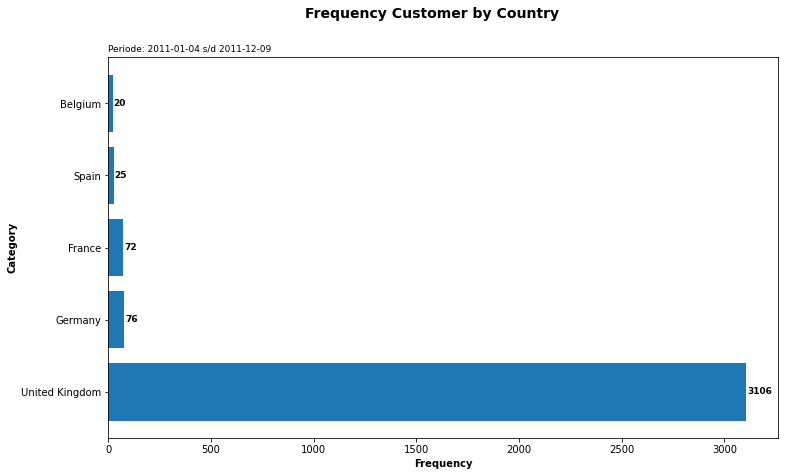

In [21]:
#visualisasi
##Tampilan
fig, ax = plt.subplots(figsize = (12, 7))
fig.suptitle('Frequency Customer by Country', fontsize = 14, fontweight ="bold")
ax.set_title('Periode: {} s/d {}'.format(str(min(data_2011['InvoiceDate']))[:10], str(max(data_2011['InvoiceDate']))[:10]),
            loc = 'left', fontsize = 9)
ax.set_ylabel('Category', fontsize = 10, fontweight ="bold")
ax.set_xlabel('Frequency', fontsize = 10, fontweight ="bold")
##plot
ax.barh(category, frequency)
for p in ax.patches:
    x = p.get_width()
    y = p.get_y()+p.get_height()/2
    space = 1
    ha = 'left'
    label = f'{x}'
    plt.annotate(
        label,
        (x,y),
        xytext=(space,0),
        textcoords = 'offset points',
        va='center',
        ha=ha,
        fontsize = 9, 
        fontweight ="bold"
    )
plt.show()

In [22]:
def get_cohort_matrix(X, var='CustomerID', fun=pd.Series.nunique):
    cd = X.groupby(['FirstTransaction', 'CohortPeriode'])[var].apply(fun).reset_index()
    cc = cd.pivot_table(index = 'FirstTransaction', columns = 'CohortPeriode', values = var)
    cs = cc.iloc[:,0]
    retention = cc.divide(cs, axis = 0)
    return cc, retention

In [23]:
top1 = data_2011[(data_2011.Country == 'United Kingdom')]
cc_top1, retention_top1 = get_cohort_matrix(top1)

In [24]:
def trend_newcustomer_top1(X, new):
    fig, ax = plt.subplots(figsize = (15,6))
    fig.suptitle('Trend New Customer by Country {}'.format(X['Country'].value_counts().index[0]), fontsize = 14, 
                 fontweight ="bold")
    ax.set_title('Peride: {} s/d {}'.format(min(new[1].index), max(new[1].index)), loc = 'left', fontsize = 12)
    ax.set_ylabel('Total New Customer', fontsize = 12, fontweight ="bold")
    ax.set_xlabel('Date', fontsize = 12, fontweight ="bold")
    ax.plot(new[1].index, new[1].values, marker = 'o')
    for s, d in zip(new[1].values, new[1].index):
        plt.annotate('%0.0f'%s, #nilai yang ditampilkan
                     xy = (d,s), #posisi annotate
                     fontweight ="bold"
                    )
    plt.show()

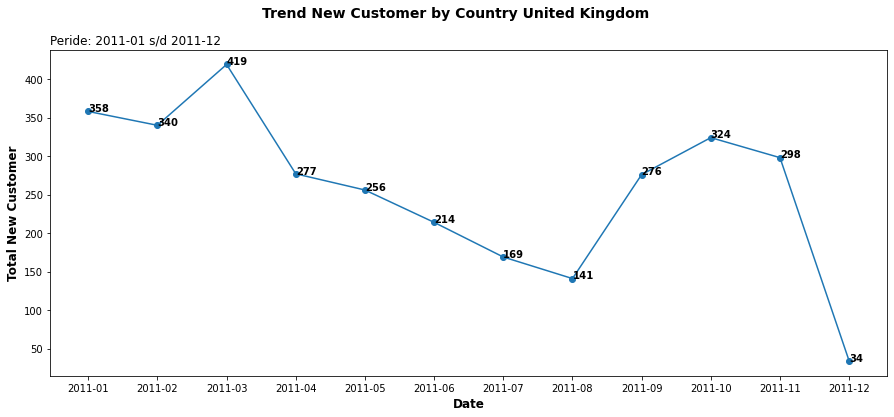

In [25]:
trend_newcustomer_top1(top1, cc_top1)

In [26]:
def vis_cohort(X, retention_rate):
    plt.figure(figsize=(18, 8))
    plt.title('Cohorts: User Retention Customer by Country {}\n'.format(X['Country'].value_counts().index[0]), fontsize = 14, 
              fontweight ="bold")
    plt.ylabel("First Transaction", fontsize = 12, fontweight ="bold", labelpad = 10)
    plt.yticks(fontsize=10)
    plt.xlabel("Periode", fontsize = 12, fontweight ="bold", labelpad = 10)
    plt.xticks(fontsize=10)
    sns.heatmap(retention_rate, mask=retention_rate.isnull(), annot=True, linewidths=2, fmt='.0%',  cmap="YlGn")
    plt.show()

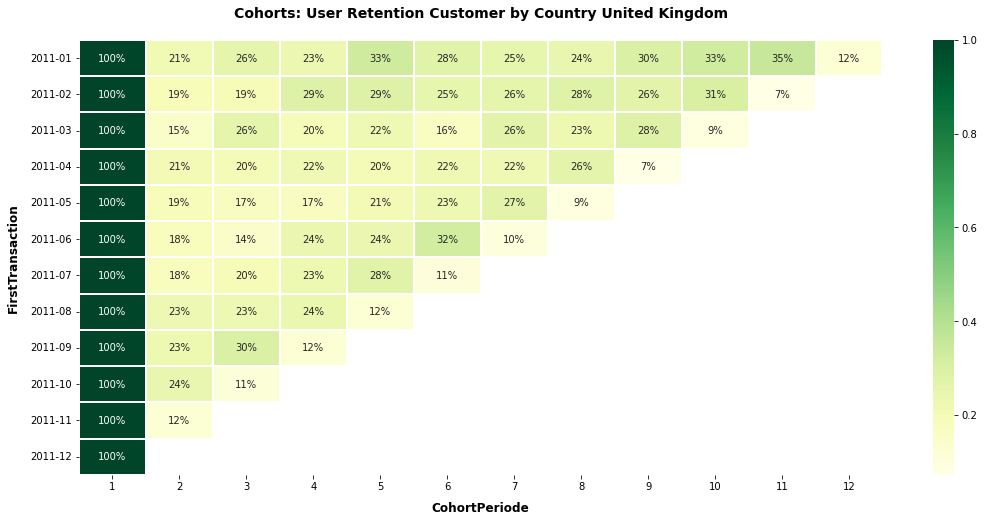

In [27]:
vis_cohort(top1, retention_top1)

Berdasarkan hasil analysis pada data transaksi periode 01-2011 s/d 12-2011 dapat disimpulkan bahwa:
1. Jumlah customer/pelanggan terbanyak berdomisili pada negara **United Kingdom** yaitu sebanyak **3.106 Customer**.
2. Trend New Customer pelanggan berdomisili pada negara **United Kingdom** mengalami **penurunan** dengan tertinggi pada customer yang diakusisi pada bulan **03-2011** sebanyak **419** pelanggan sedangkan terendah pada bulan **12-2011** sebanyak **34** pelanggan.
3. **New Customer** yang telah diakuisisi pada setiap bulan masih terdapat pelanggan yang melakukan transaksi hingga bulan 12-2011 akan tetapi retention rate **< 15%**.
4. **Customer** yang diakuisisi menjadi **New Customer** setiap bulan pada bulan berikutnya memiliki **retention rate < 50%**.
5. **Customer** yang diakuisisi menjadi **New Customer** pada bulan **01-2011** menjadi pelanggan yang memiliki **retention rate** lebih baik daripada bulan lainnya.

Rekomendasi:
1. Melakukan sebuah evaluasi secara keseluruhan karena **Customer** yang diakusisi menjadi **New Customer** pada bulan selanjutnya relatif tidak melakukan transaksi kembali dilihat dari **retention rate < 50%**.
2. Melakukan promosi atau layanan untuk mempertahankan **Customer** agar tidak terjadi **Churn**.